In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('train-balanced-sarcasm.csv')

In [12]:
df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [13]:
df['label'].value_counts()

1    505413
0    505413
Name: label, dtype: int64

In [19]:
print(df.describe())

           label         score           ups         downs
count  1010826.0  1.010826e+06  1.010826e+06  1.010826e+06
mean         0.5  6.885676e+00  5.498885e+00 -1.458629e-01
std          0.5  4.834288e+01  4.127297e+01  3.529689e-01
min          0.0 -5.070000e+02 -5.070000e+02 -1.000000e+00
25%          0.0  1.000000e+00  0.000000e+00  0.000000e+00
50%          0.5  2.000000e+00  1.000000e+00  0.000000e+00
75%          1.0  4.000000e+00  3.000000e+00  0.000000e+00
max          1.0  9.070000e+03  5.163000e+03  0.000000e+00


In [22]:
print('are there null values:',df.isnull().values.any())
print('how many are missing:', df.isnull().sum().sum())
print('which ones: \n', df.isnull().any())

are there null values: True
how many are missing: 53
which ones: 
 label             False
comment            True
author            False
subreddit         False
score             False
ups               False
downs             False
date              False
created_utc       False
parent_comment    False
dtype: bool


In [18]:
missing = df[df['comment'].isnull()]
print('num of na:', len(missing))
print('num sarcastic in missing:',len(missing[missing['label'] == 1]))
if not len(nulls) == 0:
    print('Ratio of sarcastic comments in null: ', len(nulls_sarc) / len(nulls))
else:
    print('0 of 0')

num of na: 53
num sarcastic in missing: 45
Ratio of sarcastic comments in null:  0.8490566037735849


In [5]:
df['comment_length'] = df['comment'].str.len()
df['parent_comment_length'] = df['parent_comment'].str.len()

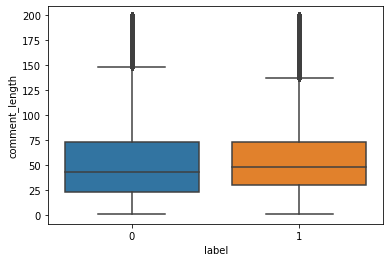

In [6]:
sns.boxplot(x='label', y='comment_length', data=df.loc[df['comment_length'] < 200][['label', 'comment_length']])

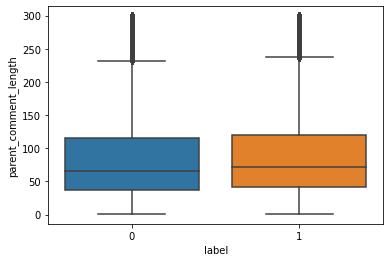

In [7]:
sns.boxplot(x='label', y='parent_comment_length', data=df.loc[df['parent_comment_length'] < 300][['label', 'parent_comment_length']])

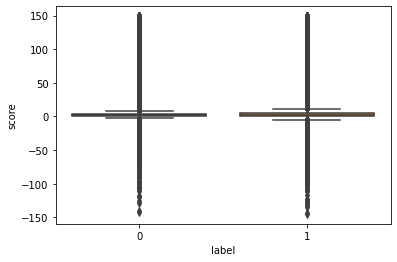

In [8]:
sns.boxplot(x='label', y='score', data=df.loc[(df['score'] < 150) & (df['score'] > -150)][['label', 'score']])

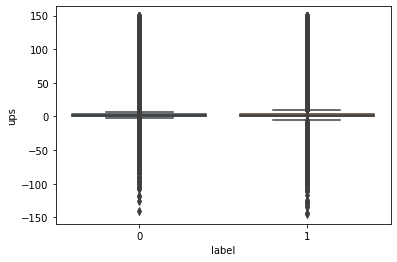

In [9]:
sns.boxplot(x='label', y='ups', data=df.loc[(df['ups'] < 150) & (df['ups'] > -150)][['label', 'ups']])

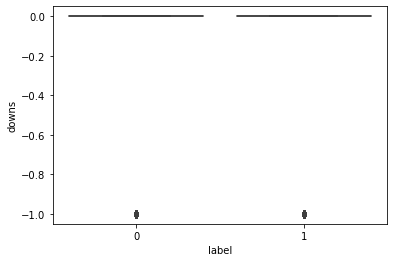

In [10]:
sns.boxplot(x='label', y='downs', data=df.loc[(df['downs'] < 150) & (df['downs'] > -150)][['label', 'downs']])

In [13]:
subreddit = df.groupby('subreddit')['label'].agg([np.size, np.mean, np.sum])\
            .sort_values(by = 'sum' , ascending = False)
subreddit.head(20)

,size,mean,sum
subreddit,,,
AskReddit,65677,0.401465,26367
politics,39496,0.605378,23910
worldnews,26377,0.642529,16948
leagueoflegends,21037,0.542330,11409
pcmasterrace,18988,0.566674,10760
news,16891,0.603457,10193
funny,17939,0.451474,8099
pics,16154,0.484400,7825
todayilearned,14161,0.547560,7754
